# Price Analysis with Dynamic Balance Tracking and Trading Strategy

In [1]:
# # 
# # Content of trading_strategy.py
# import numpy as np

# class GridBotStrategy:
#     def __init__(self, config):
#         self.grid_levels = int(config['grid_levels'])
#         self.grid_size = float(config['grid_size'])
#         self.order_size = int(config['order_size'])
#         self.orders = []

#     def execute(self, data):
#         current_price = data['price']
#         self.orders = []
#         for i in range(1, self.grid_levels + 1):
#             self.orders.append({
#                 'type': 'buy',
#                 'price': current_price - (i * self.grid_size),
#                 'size': self.order_size
#             })
#             self.orders.append({
#                 'type': 'sell',
#                 'price': current_price + (i * self.grid_size),
#                 'size': self.order_size
#             })
#         print(f"GridBot orders: {self.orders}")

# class TrendFollowingStrategy:
#     def __init__(self, config):
#         self.ma_period = int(config['moving_average_period'])
#         self.rsi_period = int(config['rsi_period'])
#         self.rsi_overbought = int(config['rsi_overbought'])
#         self.rsi_oversold = int(config['rsi_oversold'])
#         self.prices = []

#     def moving_average(self, prices):
#         return np.mean(prices[-self.ma_period:])

#     def calculate_rsi(self, prices):
#         if len(prices) < self.rsi_period + 1:
#             return 50  # Neutral RSI when insufficient data
#         deltas = np.diff(prices[-(self.rsi_period + 1):])
#         gains = deltas[deltas > 0].sum()
#         losses = -deltas[deltas < 0].sum()
#         if losses == 0:
#             return 100
#         rs = gains / losses
#         return 100 - (100 / (1 + rs))

#     def detect_trend(self, prices):
#         if len(prices) < self.ma_period:
#             return "stable"  # Not enough data to determine trend
#         ma = self.moving_average(prices)
#         recent_price = prices[-1]
#         if recent_price > ma * 1.01:  # 1% threshold for growing
#             return "growing"
#         elif recent_price < ma * 0.99:  # 1% threshold for falling
#             return "falling"
#         else:
#             return "stable"

#     def execute(self, data):
#         self.prices.append(data['price'])
#         if len(self.prices) < self.ma_period:
#             return  # Not enough data for moving average
#         ma = self.moving_average(self.prices)
#         rsi = self.calculate_rsi(self.prices)
#         trend = self.detect_trend(self.prices)
#         print(f"TrendFollowing - MA: {ma}, RSI: {rsi}, Trend: {trend}")
#         if trend == "growing" and rsi < self.rsi_oversold:
#             print("Buy Signal")
#         elif trend == "falling" and rsi > self.rsi_overbought:
#             print("Sell Signal")


Buy executed: 0.001036452017453852 units at 96483.0
Sell executed: 0.000518226008726926 units at 100340.5
Buy executed: 0.000969434333313304 units at 98201.5
Sell executed: 0.000743830171020115 units at 104458.5
Buy executed: 0.0009518410795344196 units at 98178.0
Sell executed: 0.0008478356252772673 units at 107319.5
Buy executed: 0.0009553484798541573 units at 97560.0
Sell executed: 0.0009015920525657123 units at 101459.0
Buy executed: 0.0009553877353657602 units at 97375.0
Sell executed: 0.0009284898939657363 units at 104669.5
Buy executed: 0.0009685958160968683 units at 96476.0
Sell executed: 0.0009485428550313023 units at 103326.0
Buy executed: 0.0009493303697868538 units at 98914.5
Sell executed: 0.000948936612409078 units at 106985.5
Buy executed: 0.0009733741622014798 units at 97254.0
Sell executed: 0.000961155387305279 units at 102216.5
Buy executed: 0.000968349375138899 units at 98128.5
Sell executed: 0.000964752381222089 units at 101890.5
Buy executed: 0.0009994372850444073 

/tmp/ipykernel_5817/1914046717.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1003.9981136573283' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.at[i, 'Account Balance'] = bank_account.cash + (bank_account.assets.get(symbol, 0) * row['Close'])


Sell executed: 0.0012205943969510983 units at 104009.5
Buy executed: 0.0012179236225859467 units at 99685.5
Sell executed: 0.0012192590097685225 units at 103676.5
Buy executed: 0.001259672793275251 units at 96778.5
Sell executed: 0.0012394659015218866 units at 106738.0
Buy executed: 0.0012314639591868338 units at 99839.0
Sell executed: 0.0012354649303543603 units at 101855.0
Buy executed: 0.0012272354720221194 units at 100418.5
Buy executed: 0.00115766356382064 units at 95808.0
Sell executed: 0.00181018198309856 units at 102970.5
Buy executed: 0.0012483113047165638 units at 94897.5
Sell executed: 0.001529246643907562 units at 106054.5
Buy executed: 0.0012446555204231025 units at 98689.0
Sell executed: 0.0013869510821653322 units at 104826.5
Buy executed: 0.0012901994311808485 units at 96953.5
Sell executed: 0.0013385752566730904 units at 102071.0
Buy executed: 0.001265737444713513 units at 99739.0
Sell executed: 0.0013021563506933017 units at 103569.5
Buy executed: 0.001280388195089864

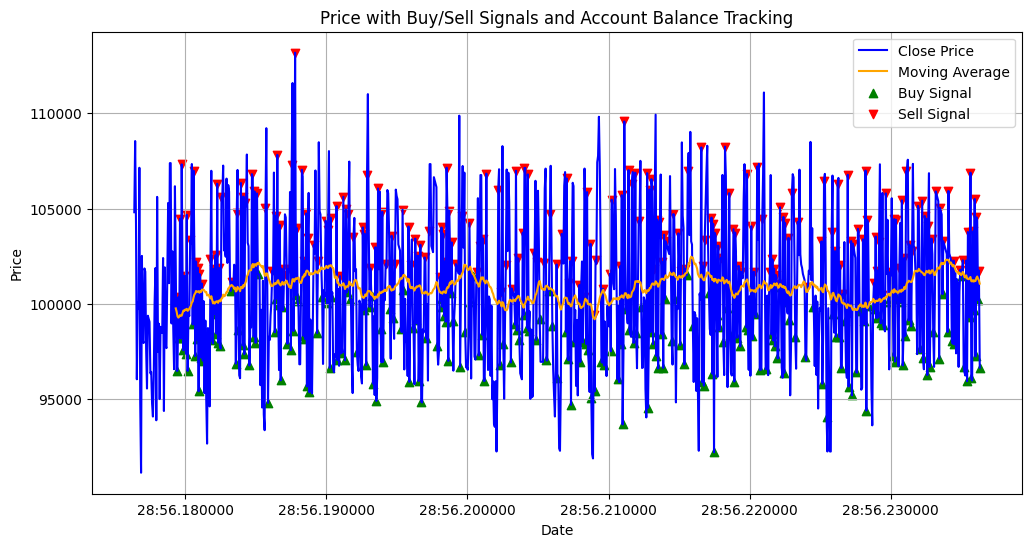

Final account balance: $2545.30
Final held quantity: 0.00575929158466436 units
Final income: 154.53031704668683 %


In [11]:

import pandas as pd
import matplotlib.pyplot as plt
from trading_strategy import GridBotStrategy, TrendFollowingStrategy
from backtester import BankAccount

# Load the data
data = pd.read_csv('realtime_data_1min.csv')

# Ensure proper formatting
data['startTime'] = pd.to_datetime(data['startTime'])
data.sort_values('startTime', inplace=True)

# Configuration
starting_balance = 1000  # Initial account balance in dollars
held_quantity = 0  # Amount of the asset held
strategy_config = {
    'grid_bot': {
        'grid_levels': 10,
        'grid_size': 0.001,
        'order_size': 100,
    },
    'trend_following': {
        'moving_average_period': 50,
        'rsi_period': 14,
        'rsi_overbought': 70,
        'rsi_oversold': 30,
    },
}

# Initialize the strategy
bank_account = BankAccount(starting_balance)
trend_strategy = TrendFollowingStrategy(strategy_config['trend_following'], bank_account)

# Apply the strategy to the data and log balance
data['Signal'] = None
data['Trend'] = None
data['Account Balance'] = starting_balance
symbol = "BTCUSD"

for i, row in data.iterrows():
    trend_strategy.execute({'price': row['Close']})
    #trend = trend_strategy.detect_trend(data['Close'][:i+1])
    trend = trend_strategy.detect_trend(data["Close"][:i+1])
    data.at[i, 'Signal'] = trend

    # Execute trades based on signals
    # if trend == "growing" and account_balance > 0:
    #     # Buy signal: Calculate how much to buy
    #     buy_amount = account_balance * 0.1  # Allocate 10% of the balance
    #     buy_quantity = buy_amount / row['Close']
    #     account_balance -= buy_amount
    #     held_quantity += buy_quantity
    #     print(f"Buy executed: {buy_quantity} units at {row['Close']}")

    if trend == "falling" and bank_account.cash > 0:
        ### buy(self, symbol, price, quantity)
        # Buy signal: Calculate how much to buy

        
        # buy_amount = account_balance * 0.1  # Allocate 10% of the balance
        # buy_quantity = buy_amount / row['Close']
        # account_balance -= buy_amount
        # held_quantity += buy_quantity
        # print(f"Buy executed: {buy_quantity} units at {row['Close']}")
        buy_amount = bank_account.cash * 0.1
        price = row["Close"] ### change to realtime spotdata
        quantity = buy_amount / price
        bank_account.buy(symbol, price, quantity)
        print(f"Buy executed: {quantity} units at {price}")

    # elif trend == "falling" and held_quantity > 0:
    #     # Sell signal: Calculate how much to sell
    #     sell_quantity = held_quantity * 0.5  # Sell 50% of held quantity
    #     sell_amount = sell_quantity * row['Close']
    #     account_balance += sell_amount
    #     held_quantity -= sell_quantity
    #     print(f"Sell executed: {sell_quantity} units at {row['Close']}")
    elif trend == "growing" and bank_account.assets[symbol] > 0:
        ###sell(self, symbol, price, quantity)
        # Sell signal: Calculate how much to sell
        sell_quantity = bank_account.assets[symbol] * 0.5  # Sell 50% of held quantity
        price = row["Close"] # change to realtime data
        sell_amount = sell_quantity * price
        bank_account.sell(symbol, price, sell_quantity)
        print(f"Sell executed: {sell_quantity} units at {price}")


    # Log balance after each iteration
    data.at[i, 'Account Balance'] = bank_account.cash + (bank_account.assets.get(symbol, 0) * row['Close'])

# Plot the data with signals
plt.figure(figsize=(12, 6))
plt.plot(data['startTime'], data['Close'], label='Close Price', color='blue')
data['MA'] = data['Close'].rolling(window=strategy_config['trend_following']['moving_average_period']).mean()
plt.plot(data['startTime'], data['MA'], label='Moving Average', color='orange')

# Add buy/sell markers based on the strategy
# buy_signals = data[data['Signal'] == 'growing']
buy_signals = data[data['Signal'] == 'falling']
# sell_signals = data[data['Signal'] == 'falling']
sell_signals = data[data['Signal'] == 'growing']

plt.scatter(buy_signals['startTime'], buy_signals['Close'], label='Buy Signal', color='green', marker='^', alpha=1)
plt.scatter(sell_signals['startTime'], sell_signals['Close'], label='Sell Signal', color='red', marker='v', alpha=1)

plt.title('Price with Buy/Sell Signals and Account Balance Tracking')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Display final account balance
print(f"Final account balance: ${bank_account.cash:.2f}")
print(f"Final held quantity: {bank_account.assets.get(symbol, 0)} units")
print(f"Final income: {(bank_account.cash - starting_balance)/starting_balance * 100} %")


## 